# Cardiovascular Disease Prediction

**Importing Required Libraries**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, KFold


from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import  confusion_matrix, auc


# **Read Data**

In [86]:
df=pd.read_csv("../data/Cardiovascular_Dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Check Data

**Check Null Values**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [88]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Check for duplicated values**

In [90]:
df.duplicated().sum()


723

In [91]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Data Visiualization and Pre-Processing

**Plot Target Values (1 or 0)**

<Axes: xlabel='target'>

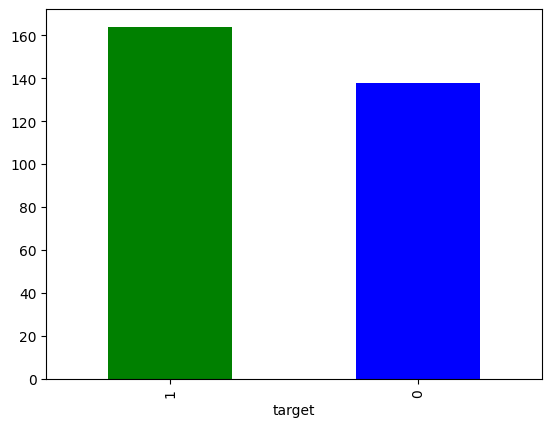

In [92]:
df['target'].value_counts().plot(kind="bar", color=["green","blue"])

**Heart disease frequency for sex (crosstab)**

In [93]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

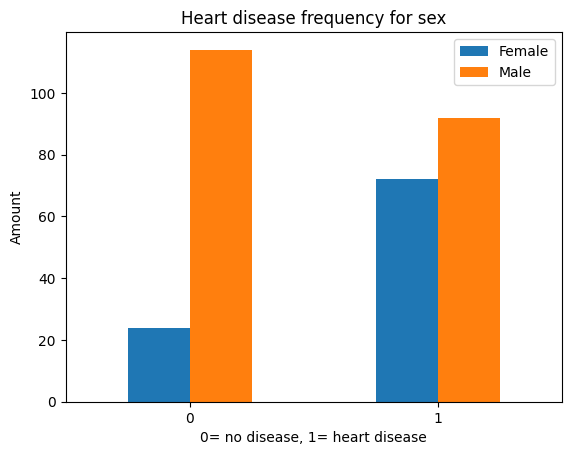

In [94]:
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title("Heart disease frequency for sex")
plt.xlabel("0= no disease, 1= heart disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0)
plt.xticks(rotation=0)

**Heart Disease in function of Age and Max Heart Rate**

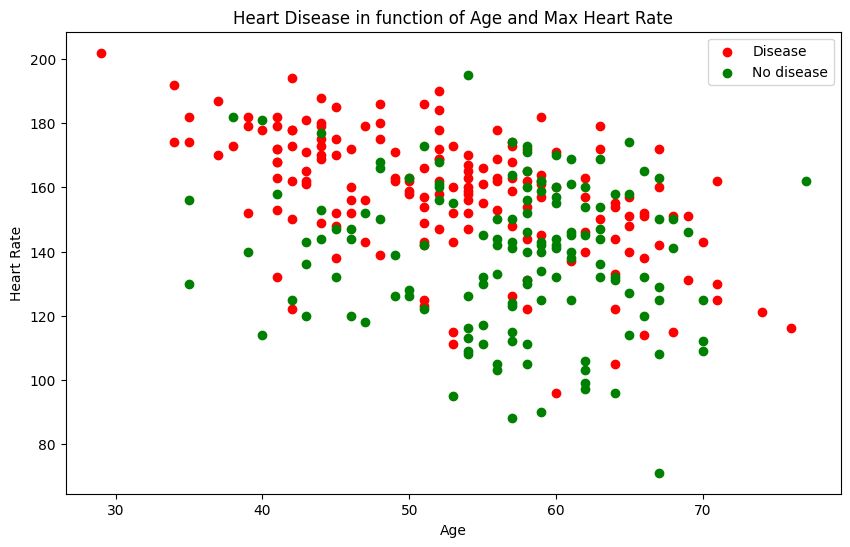

In [95]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c="green")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease","No disease"])


**Chest Pain Type Influence**

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

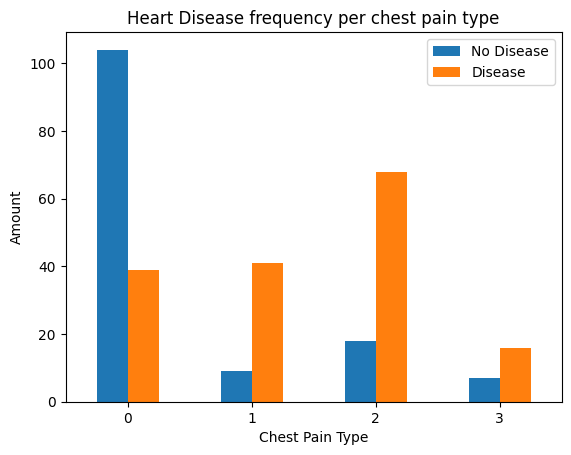

In [96]:
pd.crosstab(df.cp, df.target).plot(kind="bar")

plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

**Checking Distribution of Numerical Features**

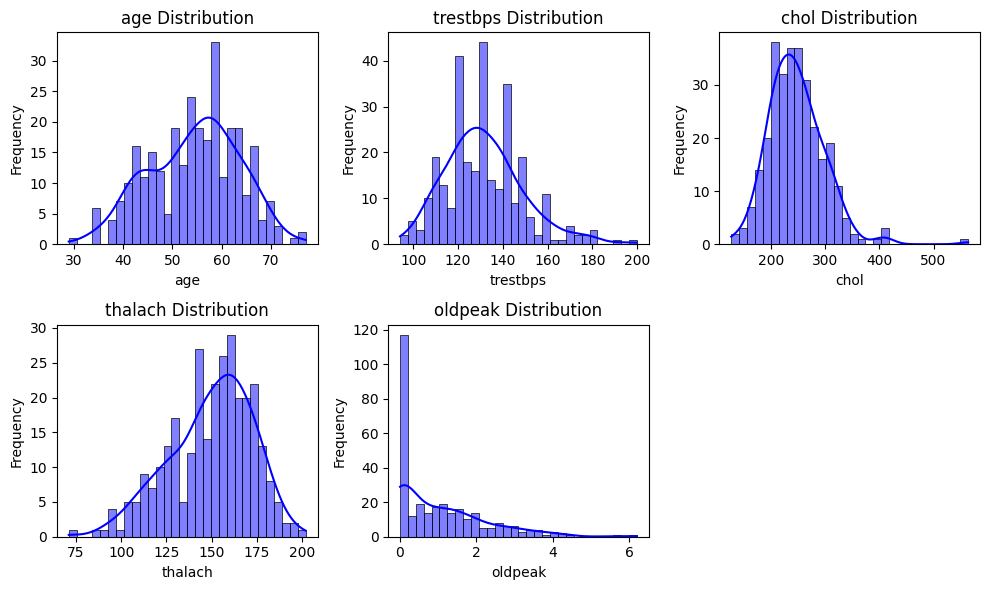

In [97]:
plt.figure(figsize=(10,6))

num_features = ['age', 'trestbps', 'chol','thalach', 'oldpeak']

# Plot data on each subplot
for i, column in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], color='blue', kde=True, bins=30)

    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Checking Distribution of Categorical Features**


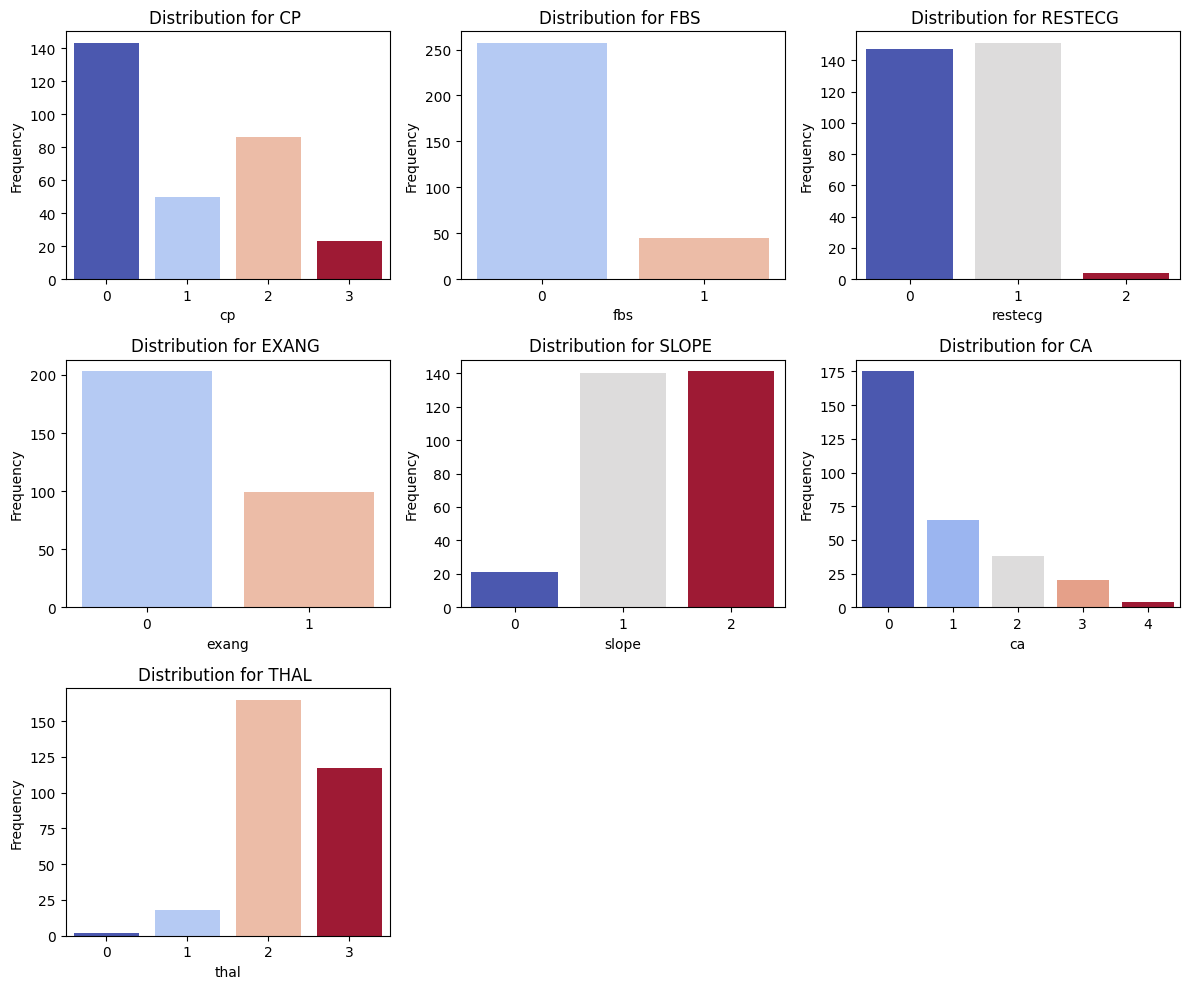

In [98]:
plt.figure(figsize=(12,10))

catag = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal']

for i, column in enumerate(catag):
    plt.subplot(3,3,i+1)
    sns.countplot(x = df[column], data = df, palette = 'coolwarm', hue = df[column])
    plt.title(f'Distribution for {column.upper()} ')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.legend().remove()

plt.tight_layout()
plt.show()


# Heatmap plot to check Coorealtion between features


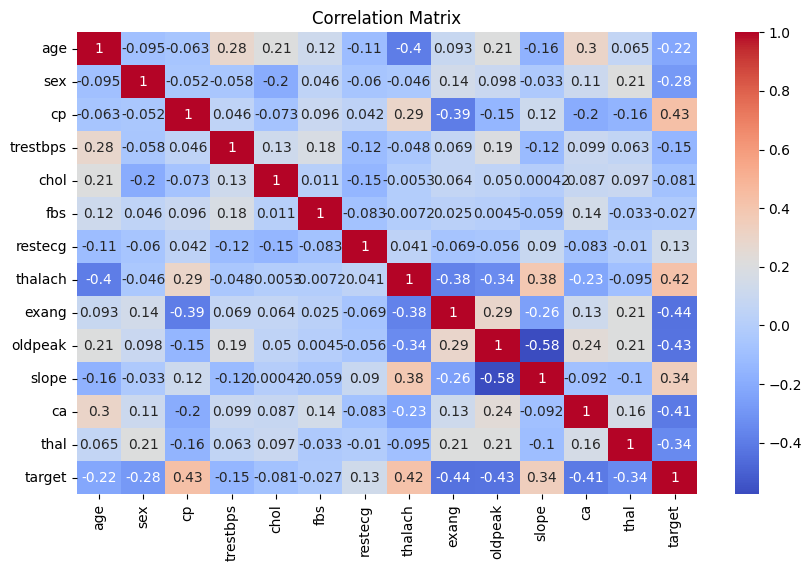

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


* There is no correlaton among Features
* So far we will stick with all the Features

**Pair Plotting the numerical features**

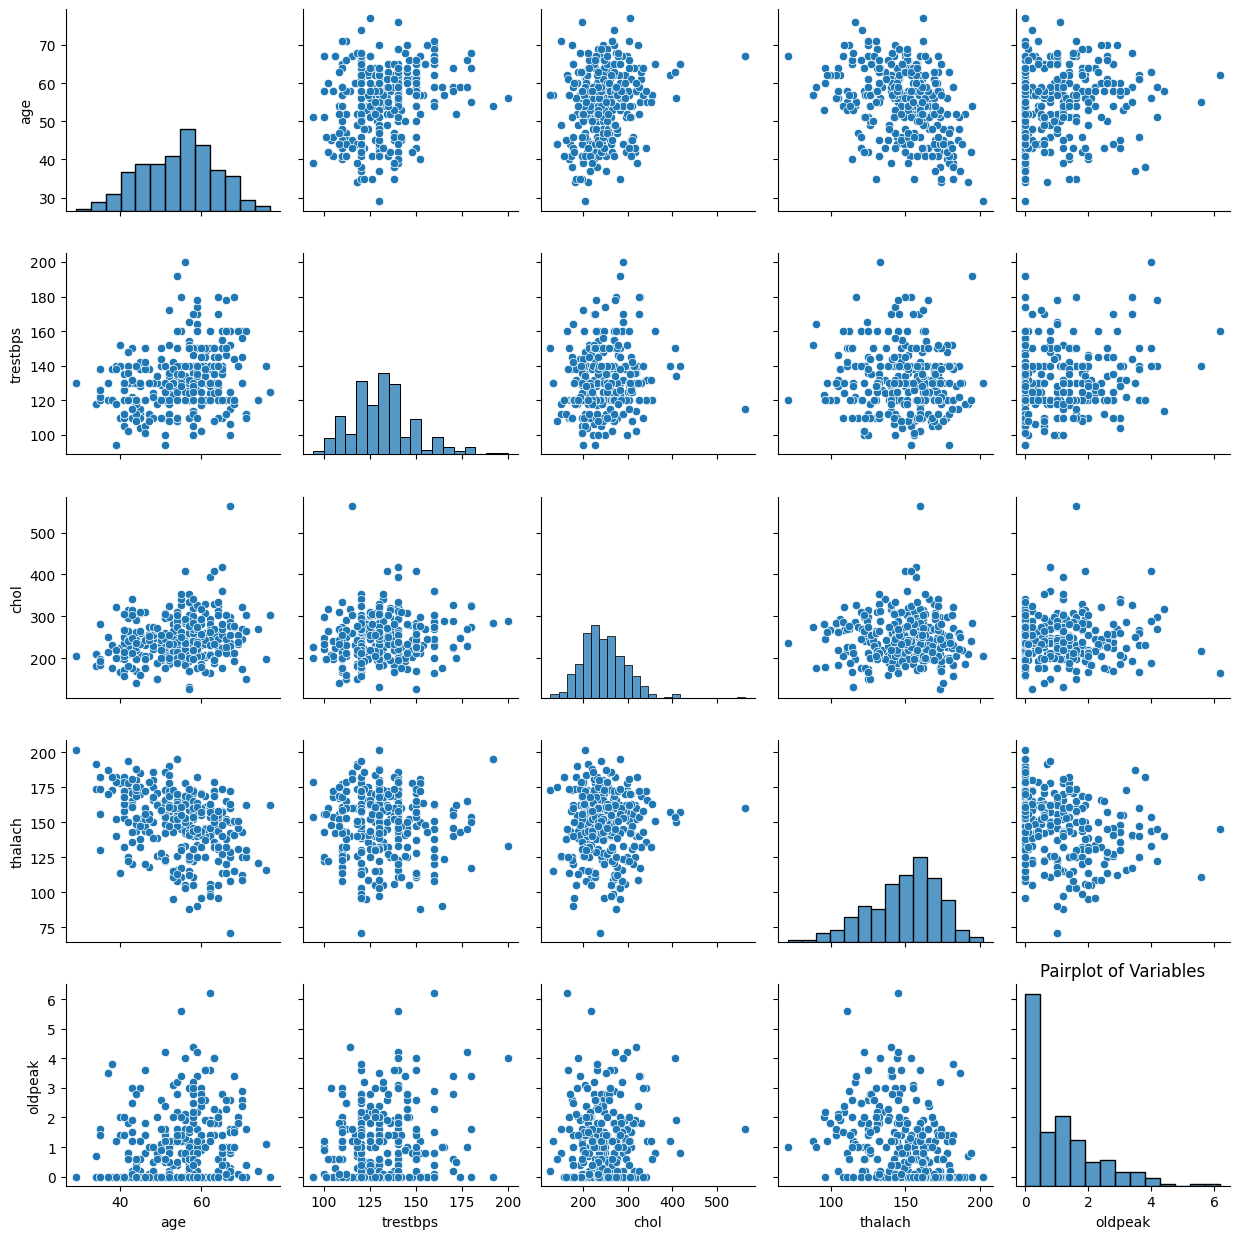

In [100]:
sns.pairplot(df[num_features])
plt.title('Pairplot of Variables')
plt.tight_layout()
plt.show()

Outliers
* There is not much skewness in the Fetaures

* Few outliers can be seen in the boxplots

* There are not much outliers

* These outliers can be removed with data scaling

# Feature Selection and Scaling

1. Feature Selection:

Feature selection involves choosing the subset of relevant features (variables, columns) from the original dataset that are most useful for predictive modeling or analysis.
* filter methods (e.g., correlation, chi-square), wrapper methods (e.g., forward selection, backward elimination), or embedded methods (e.g., Lasso regression, decision trees).

2. Scaling:

* Feature scaling is the process of standardizing or normalizing the range of independent variables or features in the dataset.
* Scaling ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating those with smaller scales.
* StandardScaler is a method used for standardization, which transforms the data such that it has a mean of 0 and a standard deviation of 1.

In [101]:
# Creating Dummy variables for the categorical features
df = pd.get_dummies(df, columns = catag, drop_first = True)
df.astype('int64')

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,0,108,141,175,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,1,128,255,161,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,1,160,273,125,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [102]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [103]:
# Applying the standard scaler to the dataset
new_df = df.copy()
scaler = StandardScaler()
new_df[num_features] = scaler.fit_transform(new_df[num_features])


In [104]:
new_df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

# Data Splitting


In [105]:
X=new_df.drop('target',axis=1)
y=new_df['target']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection


We will test following models to select the final model

Model 1: Support Vector Classifier

Model 2: Random Forest Classifier

Model 3 : AdaBoost Classifier

Model 4 : Logistic Regression

Model 5 : KNN

In [107]:
# creating list of models
models = [('SVM',SVC(kernel='linear')), 
          ('Random Forest',RandomForestClassifier(n_estimators=10)), 
          ('AdaBoost', AdaBoostClassifier(algorithm='SAMME')),
          ('Logistic Regression', LogisticRegression()),
          ('KNN', KNeighborsClassifier())]

**Evaluating Models**

*On Train set*

In [108]:
def fit_and_score_train(models, X_train, y_train ):
    np.random.seed(42)
    model_scores={}
    
    for name,model in models:
        model.fit(X_train, y_train)
        y_pred=model.predict(X_train)
        print(f'Predicting on the training datase \n \t\t**{name}** \nAccuracy Score for {name} is: {accuracy_score(y_train, y_pred)}')
        print(f'Precision Score {name} is: {precision_score(y_train, y_pred)}\n')
        
    return (model_scores)

model_scores= fit_and_score_train(models, X_train, y_train)

Predicting on the training datase 
 		**SVM** 
Accuracy Score for SVM is: 0.8838174273858921
Precision Score SVM is: 0.8601398601398601

Predicting on the training datase 
 		**Random Forest** 
Accuracy Score for Random Forest is: 0.995850622406639
Precision Score Random Forest is: 0.9924242424242424

Predicting on the training datase 
 		**AdaBoost** 
Accuracy Score for AdaBoost is: 0.921161825726141
Precision Score AdaBoost is: 0.9117647058823529

Predicting on the training datase 
 		**Logistic Regression** 
Accuracy Score for Logistic Regression is: 0.8838174273858921
Precision Score Logistic Regression is: 0.8652482269503546

Predicting on the training datase 
 		**KNN** 
Accuracy Score for KNN is: 0.8547717842323651
Precision Score KNN is: 0.8529411764705882



*On Test set*

In [109]:
# creating a function to fit the models for Test Dataset
def fit_and_score_test(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'Predicting on the test datase \n \t\t**{name}** \nAccuracy Score for {name} is: {accuracy_score(y_test, y_pred)}')
        print(f'Precision Score {name} is: {precision_score(y_test, y_pred)}\n')
        #model_scores[name] = model.score(X_test, y_test)

    return (model_scores)

model_scores = fit_and_score_test(models, X_train, X_test, y_train, y_test)

Predicting on the test datase 
 		**SVM** 
Accuracy Score for SVM is: 0.8524590163934426
Precision Score SVM is: 0.875

Predicting on the test datase 
 		**Random Forest** 
Accuracy Score for Random Forest is: 0.7704918032786885
Precision Score Random Forest is: 0.8275862068965517

Predicting on the test datase 
 		**AdaBoost** 
Accuracy Score for AdaBoost is: 0.819672131147541
Precision Score AdaBoost is: 0.8666666666666667

Predicting on the test datase 
 		**Logistic Regression** 
Accuracy Score for Logistic Regression is: 0.8524590163934426
Precision Score Logistic Regression is: 0.875

Predicting on the test datase 
 		**KNN** 
Accuracy Score for KNN is: 0.8032786885245902
Precision Score KNN is: 0.8620689655172413



**Applying K-Fold Cross Validation**


In [110]:
# Selecting best model using Cross validation by iterating through the models 

for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} has a cross-validated score of {(cv_scores)}')
    print(f'{name} has a cross-validated mean score of {np.mean(cv_scores)}\n')


SVM has a cross-validated score of [0.83606557 0.83606557 0.9        0.78333333 0.78333333]
SVM has a cross-validated mean score of 0.82775956284153

Random Forest has a cross-validated score of [0.7704918  0.75409836 0.8        0.75       0.8       ]
Random Forest has a cross-validated mean score of 0.7749180327868853

AdaBoost has a cross-validated score of [0.8852459  0.80327869 0.88333333 0.73333333 0.78333333]
AdaBoost has a cross-validated mean score of 0.8177049180327869

Logistic Regression has a cross-validated score of [0.86885246 0.85245902 0.9        0.8        0.8       ]
Logistic Regression has a cross-validated mean score of 0.8442622950819672

KNN has a cross-validated score of [0.81967213 0.83606557 0.86666667 0.75       0.76666667]
KNN has a cross-validated mean score of 0.8078142076502732



# Tuning Hyperparameters

**GridSearch to Logistic Regression**

In [111]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(LogisticRegression().get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [112]:
# Defining KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creating a hyperparameter grid for Logistic Regression
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

# Creating a RandomizedSearchCV object
grid_search = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_grid, cv=kf)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_


c:\Users\msi\OneDrive\Bureau\pp\env\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\msi\OneDrive\Bureau\pp\env\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\msi\OneDrive\Bureau\pp\env\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\msi\OneDrive\Bureau\pp\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_

In [113]:
print(f'The best parameters are {best_params}')

The best parameters are {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 0.004832930238571752}


# Predicting with the best Model with Hyperparameter (Logistic Regression)


Model Performance

Accuracy with Logistic Regression on Test dataset: 0.8688524590163934


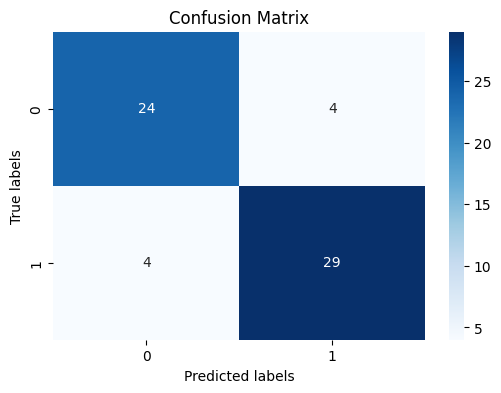


Classification Report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Sensitivity: 0.8571428571428571

Specificity: 0.8787878787878788


In [114]:

# Creating logistic regression classifier with best parameters
logreg_clf = LogisticRegression(**best_params)

# Fit the model to the training data
logreg_clf.fit(X_train, y_train)

# Predicting on the test dataset
y_pred_test = logreg_clf.predict(X_test)

# Calculating the accuracy score for the test dataset
accuracy = accuracy_score(y_test, y_pred_test)
print('\nModel Performance')
print('\nAccuracy with Logistic Regression on Test dataset:', accuracy)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Creating a classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report\n', class_report)

# Sensitivity
sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print('\nSensitivity:', sensitivity)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print('\nSpecificity:', specificity)


In [115]:
# ROC Score
AuC = roc_auc_score(y_test, y_pred_test)
print('\nROC Score:', AuC)



ROC Score: 0.8679653679653682



FPR :  [0.         0.14285714 1.        ]

TPR :  [0.         0.87878788 1.        ]

Thresholds :  [inf  1.  0.]


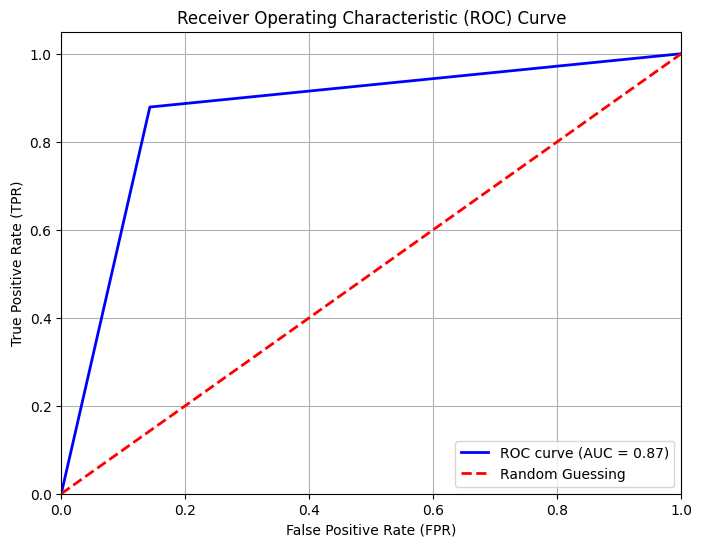

In [116]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test) # fpr = false positive rate, tpr = true positive rate
print('\nFPR : ', fpr)
print('\nTPR : ', tpr)
print('\nThresholds : ', thresholds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AuC)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

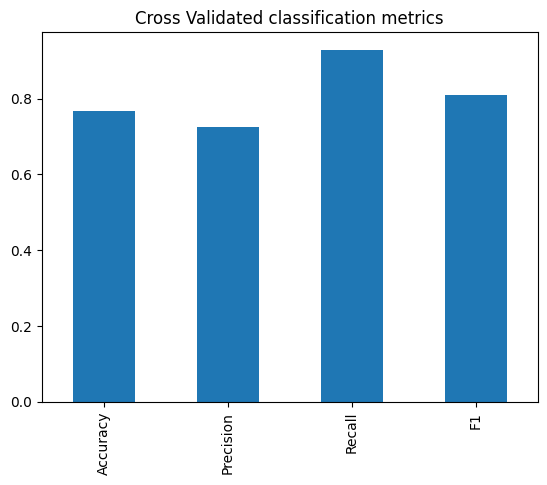

In [117]:
cv_acc = cross_val_score(logreg_clf, X_train, y_train, cv=kf, scoring='accuracy').mean()
cv_precision = cross_val_score(logreg_clf, X_train, y_train, cv=kf, scoring='precision').mean()
cv_recall = cross_val_score(logreg_clf, X_train, y_train, cv=kf, scoring='recall').mean()
cv_f1 = cross_val_score(logreg_clf, X_train, y_train, cv=kf, scoring='f1').mean()


cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title="Cross Validated classification metrics", legend=False);


# Pickle The Model

In [118]:
import pickle

model=logreg_clf
model_pkl_file = "heart-disease-model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)


In [126]:

# Example input data
input_data = {
    'age': 55,
    'sex': 1,  # Male
    'trestbps': 140,
    'chol': 260,
    'thalach': 100,
    'oldpeak': 2.5,
    'cp_1': 0, 'cp_2': 1, 'cp_3': 0,
    'fbs_1': 0,
    'restecg_1': 0, 'restecg_2': 1,
    'exang_1': 0,
    'slope_1': 0, 'slope_2': 1,
    'ca_1': 0, 'ca_2': 1, 'ca_3': 0, 'ca_4': 0,
    'thal_1': 0, 'thal_2': 1, 'thal_3': 0
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

print(input_df)


# Make prediction
prediction = logreg_clf.predict(input_df)

# Print prediction result
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')


   age  sex  trestbps  chol  thalach  oldpeak  cp_1  cp_2  cp_3  fbs_1  ...  \
0   55    1       140   260      100      2.5     0     1     0      0  ...   

   exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  
0        0        0        1     0     1     0     0       0       1       0  

[1 rows x 22 columns]
The person does not have heart disease.
